<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 1. Библиотеки и инструменты для анализа данных. Математика в машинном обучении</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [32]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
%pylab inline
import pandas as pd
import sys
sys.path.append('../../scripts/') 
from scipy.stats import ttest_ind
from yandex_mipt_stat_tests import * # стат. тесты - дополнительно

Populating the interactive namespace from numpy and matplotlib


В качестве дополнительного задания будет проверка статистических гипотез. Реализация Z-критерия: tribute to YDF & MIPT ([специализация](https://www.coursera.org/specializations/machine-learning-data-analysis) "Машинное обучение и анализ данных").

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [22]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [23]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               714 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
Embarked          889 non-null object
Age_category      891 non-null int64
Num_rel_friens    891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


**Возьмем первые 10 элементов столбца Parch - количество родителей и детей пассажира на борту:**

In [24]:
data['Parch'][:10]

PassengerId
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     2
10    0
Name: Parch, dtype: int64

**Отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br />
Если нет - посмотрите, как вычисляется выражение в квадратных в скобках.

In [6]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C


In [7]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort(columns='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Примеры создания признаков**

In [35]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [36]:
age_categories = [age_category(age) for age in data.Age]

In [37]:
data['Age_category'] = age_categories

In [38]:
data['Num_rel_friens'] = data['Parch'] + data['SibSp']

In [39]:
data['Num_rel_friens'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Num_rel_friens, dtype: int64

In [30]:
pd.crosstab(data["Sex"], data['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


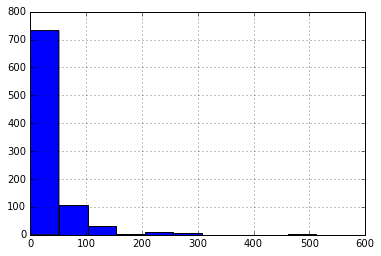

In [34]:
data['Fare'].hist()

In [26]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1. Сколько мужчин / жещин находилось на борту?**

In [66]:
# Ваш код здесь
sum(data['Sex'] == 'male')

577

In [67]:
sum(data['Sex'] == 'female')

314

**2. Выведите распределение переменной Pclass (социально-экономический статус). Дополнительно - это же распределение только для мужчин / женщин.**


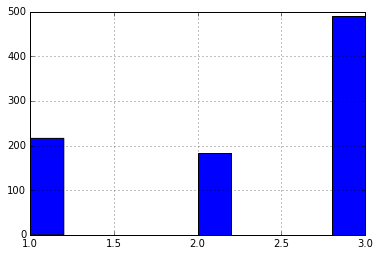

In [61]:
# Ваш код здесь
data['Pclass'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a7bd450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b5bb150>]], dtype=object)

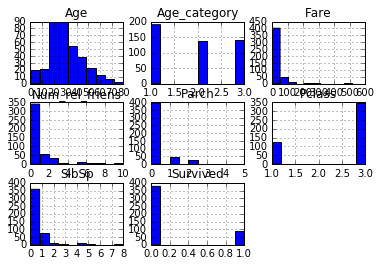

In [72]:
data[(data['Sex'] == 'male')&(data['Pclass'])].hist()

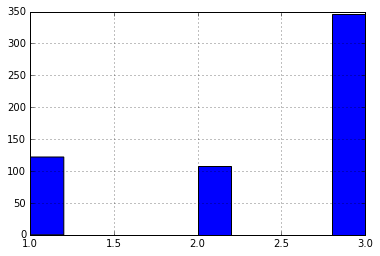

In [71]:
data[data['Sex'] == 'male']['Pclass'].hist()

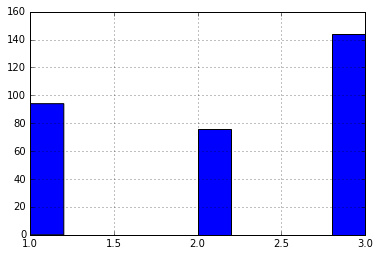

In [73]:
data[data['Sex'] == 'female']['Pclass'].hist()

**3. Сколько в среднем заплатил один пассажир? Найдите стандартное отклонение этой величины. Лучше округлить до 2 десятичных знаков.**

In [77]:
# Ваш код здесь
round(data['Fare'].mean())

32.0

In [78]:
round (data['Fare'].std())

50.0

**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" - те, кто моложе 30, а "старики" - те, кто старше 60. Дополнительно: проверить, действительно ли молодые выживают чаще, с помощью Z-критерия для разности долей в независимых выборках (proportions_diff_z_test из ../../scripts/yandex_mipt_stat_tests.py)**

In [84]:
# Ваш код здесь

print(float(len(data[(data['Age'] < 30) &
                     (data['Survived'] == 1)]))
      /len(data[data['Age'] < 30]))
print(float(len(data[(data['Age'] > 60) & 
                     (data['Survived'] == 1)]))
      /len(data[data['Age'] > 60]))

0.40625
0.227272727273


** Z - критерий??? **

In [88]:
data[(data['Age'] < 30)]['Age'].value_counts()
#второй скобкой выбираем series конкретный столбец

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
21.00    24
25.00    23
29.00    20
27.00    18
26.00    18
16.00    17
20.00    15
23.00    15
17.00    13
4.00     10
2.00     10
9.00      8
1.00      7
3.00      6
14.00     6
15.00     5
8.00      4
11.00     4
5.00      4
6.00      3
7.00      3
28.50     2
0.75      2
10.00     2
13.00     2
0.83      2
12.00     1
23.50     1
0.42      1
24.50     1
20.50     1
0.67      1
14.50     1
0.92      1
Name: Age, dtype: int64

In [99]:
sum(data[(data['Age'] < 30) & (data['Survived'] ==1)]['Survived'])
#кол-во пассажиров, которым меньше 30 лет и они выжили

156

In [103]:
help(proportions_diff_z_test)

Help on function proportions_diff_z_test in module yandex_mipt_stat_tests:

proportions_diff_z_test(z_stat, alternative='two-sided')
    :param z_stat (float) - Z-statistic computed for 2 binary vectors
    :alternative (str) - 'two-sided', 'less' or 'greater'
    
    :return p-value (float)



**5. Правда ли, что женщины выживали чаще мужчин? Дополнительно: проверить, действительно ли женщины выживают чаще, с помощью Z-критерия для разности долей в независимых выборках.**

In [101]:
# Ваш код здесь

sum(data[(data['Sex'] == 'female') & (data['Survived'] ==1)]['Survived'])

233

In [102]:
sum(data[(data['Sex'] == 'male') & (data['Survived'] ==1)]['Survived'])

109

да, женщины выжили больше

**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [112]:
# Ваш код здесь

def parse_full_name(full_name):
    return full_name.split(",")[1].split()[1] 

names = data[data['Sex'] == 'male']['Name'].apply(parse_full_name)
names.value_counts().head()

William    35
John       25
George     14
Thomas     13
Charles    13
Name: Name, dtype: int64

In [114]:
data.Name.value_counts()

Graham, Mr. George Edward                                  1
Elias, Mr. Tannous                                         1
Madill, Miss. Georgette Alexandra                          1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)        1
Beane, Mrs. Edward (Ethel Clarke)                          1
Roebling, Mr. Washington Augustus II                       1
Moran, Mr. James                                           1
Padro y Manent, Mr. Julian                                 1
Scanlan, Mr. James                                         1
Ali, Mr. William                                           1
Weisz, Mrs. Leopold (Mathilde Francoise Pede)              1
Abbing, Mr. Anthony                                        1
Lahtinen, Mrs. William (Anna Sylfven)                      1
Frost, Mr. Anthony Wood "Archie"                           1
Lang, Mr. Fang                                             1
Razi, Mr. Raihed                                           1
Corn, Mr. Harry         

**7. Сравните распределение стоимости билетов у спасенных и у погибших. Дополнительно: проверить равенство средних стоимостей билетов спасенных и погибших с помощью t-теста Стьюдента.**

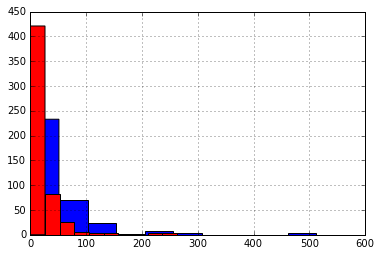

In [120]:
# Ваш код здесь
data[data['Survived'] == 1]['Fare'].hist(color="blue")
data[data['Survived'] == 0]['Fare'].hist(color="red")

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**

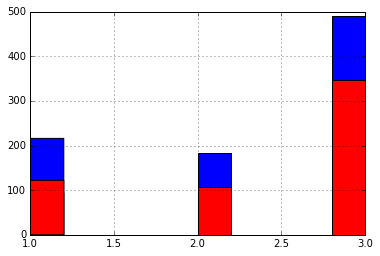

In [135]:
# Ваш код здесь

data['Pclass'].hist()
data[data['Sex'] == 'female']['Pclass'].hist()
data[data['Sex'] == 'male']['Pclass'].hist()